In [2]:
import pandas as pd
import os
from matplotlib import pyplot as plt

In [3]:
os.chdir("/Users/numanrsheidat/Documents/UNI/DATA_3888/individual_book_train/")

In [35]:
files = os.listdir()
file = files[0]
file

'stock_13.csv'

In [16]:
df = pd.read_csv(file)
df["spread"] = df['ask_price1']/df['bid_price1'] - 1
df['wap'] = (df['bid_price1']*df['ask_size1'] + df['ask_price1']*df['bid_size1'])/(df['bid_size1'] + df['ask_size1'])

df.head()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id,spread,wap
0,5,0,1.000129,1.000386,0.999871,1.000643,302,615,500,400,13,0.000257,1.000213
1,5,1,1.000129,1.000386,0.999871,1.000643,602,515,400,500,13,0.000257,1.000267
2,5,2,1.000129,1.000386,0.999871,1.000643,502,515,400,500,13,0.000257,1.000256
3,5,3,1.000129,1.000386,0.999871,1.000643,502,515,400,500,13,0.000257,1.000256
4,5,4,1.000129,1.000386,0.999871,1.000643,502,515,400,600,13,0.000257,1.000256


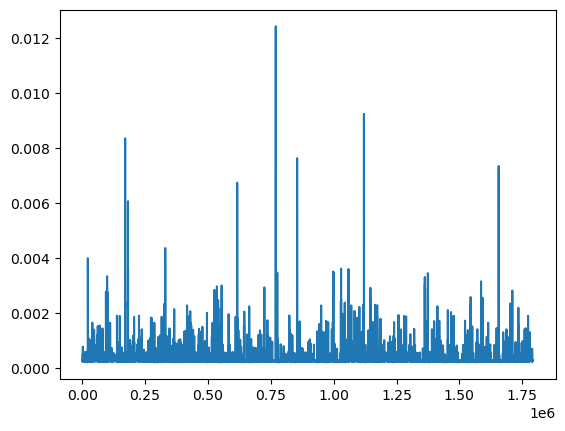

In [17]:
plt.plot(df['bid_price1']-df['bid_price2'])
plt.plot()

plt.show()

In [20]:
tid = df["time_id"].unique()
tid.sort()

In [37]:
id = []
open_bid = []
open_ask = []
open_wap = []
open_spread = []

high_bid = []
high_ask = []
high_wap = []
high_spread = []

low_bid = []
low_ask = []
low_wap = []
low_spread = []

close_bid = []
close_ask = []
close_wap = []
close_spread = []

mean_ask_size = []
mean_bid_size = []
mean_spread = []



In [38]:
dt =  df[df["time_id"] == tid[0]]
dt.head()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id,spread,wap
0,5,0,1.000129,1.000386,0.999871,1.000643,302,615,500,400,13,0.000257,1.000213
1,5,1,1.000129,1.000386,0.999871,1.000643,602,515,400,500,13,0.000257,1.000267
2,5,2,1.000129,1.000386,0.999871,1.000643,502,515,400,500,13,0.000257,1.000256
3,5,3,1.000129,1.000386,0.999871,1.000643,502,515,400,500,13,0.000257,1.000256
4,5,4,1.000129,1.000386,0.999871,1.000643,502,515,400,600,13,0.000257,1.000256


In [39]:
for file in files:
    df = pd.read_csv(file)
    df["spread"] = df['ask_price1']/df['bid_price1'] - 1
    df['wap'] = (df['bid_price1']*df['ask_size1'] + df['ask_price1']*df['bid_size1'])/(df['bid_size1'] + df['ask_size1'])
    tid = df["time_id"].unique()
    tid.sort()

    for i in tid:
        dt =  df[df["time_id"] == tid[0]]

        id.append(i)

        open_bid.append( dt.iloc[0]["bid_price1"] )
        open_ask.append( dt.iloc[0]["ask_price1"] )
        open_wap.append( dt.iloc[0]['wap'] )
        open_spread.append( dt.iloc[0]['spread'] )

        high_bid.append( dt['bid_price1'].max() )
        high_ask.append( dt['ask_price1'].max() )
        high_wap.append( dt['wap'].max() )
        high_spread.append( dt['spread'].max() )

        low_bid.append( dt['bid_price1'].min() )
        low_ask.append( dt['ask_price1'].min() )
        low_wap.append( dt['wap'].min() )
        low_spread.append( dt['spread'].min() )

        close_bid.append( dt.iloc[-1]["bid_price1"] )
        close_ask.append( dt.iloc[-1]["ask_price1"] )
        close_wap.append( dt.iloc[-1]["wap"] )
        close_spread.append( dt.iloc[-1]["spread"] )

        mean_ask_size.append( dt['ask_size1'].mean() )
        mean_bid_size.append( dt['bid_size1'].mean() )
        mean_spread.append( dt['spread'].mean() )



In [40]:
buckets = pd.DataFrame({
    "id" : id,
    "open_bid" : open_bid,
    "open_ask" : open_ask,
    "open_wap" : open_wap,
    "open_spread" : open_spread,

    "high_bid" : high_bid,
    "high_ask" : high_ask,
    "high_wap" : high_wap,
    "high_spread" : high_spread,

    "low_bid" : low_bid,
    "low_ask" : low_ask,
    "low_wap" : low_wap,
    "low_spread" : low_spread,

    "close_bid" : close_bid,
    "close_ask" : close_ask,
    "close_wap" : close_wap,
    "close_spread" : close_spread,

    "mean_ask_size" : mean_ask_size,
    "mean_bid_size" : mean_bid_size,
    "mean_spread" : mean_spread

})

In [41]:
buckets.to_csv(f"test.csv")